In [31]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the data



In [32]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the data


In [33]:
lead_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [34]:
lead_data.shape

(9240, 37)

We have null values in multiple columns


In [35]:
lead_data.isnull().sum()




Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<Axes: >

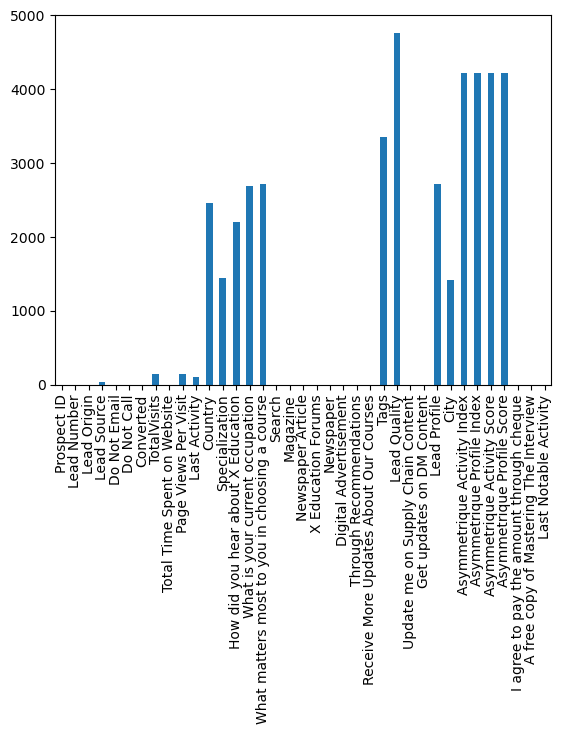

In [36]:
lead_data.isnull().sum().plot(kind='bar')


In [37]:
lead_data.describe()



,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning Data

In [38]:
# Converting each and every value to lower case in lead_data
lead_data  = lead_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [41]:
select_cols = lead_data.apply(lambda x: x.astype(str).str.contains('select', case=False).any())
print("Columns containing 'Select' values:")
print(select_cols[select_cols].index.tolist())

Columns containing 'Select' values:
[]


In [40]:
# Converting "Select" values to NaN since they represent no selection/missing data

lead_data = lead_data.replace("select", np.nan)

In [42]:
# Get columns with only 1 unique value
single_value_cols = lead_data.nunique()[lead_data.nunique() == 1].index

single_value_cols

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

We can drop these columns as there values are irrelavant 

In [43]:
# Drop those columns
lead_data = lead_data.drop(columns=single_value_cols)

lead_data.shape

(9240, 32)

In [48]:
#checking the percentage missing values in every column
missing_percentages = (lead_data.isnull().sum() / len(lead_data)) * 100
print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums         

In [45]:
# Dropping the columns having more than 35% of NAN values 
columns_to_drop = missing_percentages[missing_percentages > 35].index
print(columns_to_drop)
lead_data = lead_data.drop(columns=columns_to_drop)


Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [47]:
# Filling the remaining columns with default values
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('NA')
lead_data['Country'] = lead_data['Country'].fillna('NA')
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('NA')

In [49]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [50]:
# Checking the coutries 
lead_data["Country"].value_counts()

Country
india                   6492
NA                      2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

We can convert this into 3 categories india, NA and outside india

In [51]:
lead_data["Country"].value_counts(normalize = True)

Country
india                   0.702597
NA                      0.266342
united states           0.007468
united arab emirates    0.005736
singapore               0.002597
saudi arabia            0.002273
united kingdom          0.001623
australia               0.001407
qatar                   0.001082
bahrain                 0.000758
hong kong               0.000758
oman                    0.000649
france                  0.000649
unknown                 0.000541
kuwait                  0.000433
south africa            0.000433
canada                  0.000433
nigeria                 0.000433
germany                 0.000433
sweden                  0.000325
philippines             0.000216
uganda                  0.000216
italy                   0.000216
bangladesh              0.000216
netherlands             0.000216
asia/pacific region     0.000216
china                   0.000216
belgium                 0.000216
ghana                   0.000216
kenya                   0.000108
sr

In [52]:
def categorize_country(country):
    if country == 'india':
        return 'india'
    elif country == 'NA':
        return 'NA' 
    else:
        return 'out of india'

lead_data['Country'] = lead_data['Country'].str.lower()
lead_data['Country'] = lead_data['Country'].apply(categorize_country)

In [53]:
lead_data = lead_data[lead_data.isnull().sum(axis=1) <1]

In [54]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [55]:
lead_data = lead_data.drop('Prospect ID', axis=1)

In [56]:
lead_data.shape


(9074, 21)

# Exploratory Data Analysis

## Univariate Analysis

### Categorical Variables

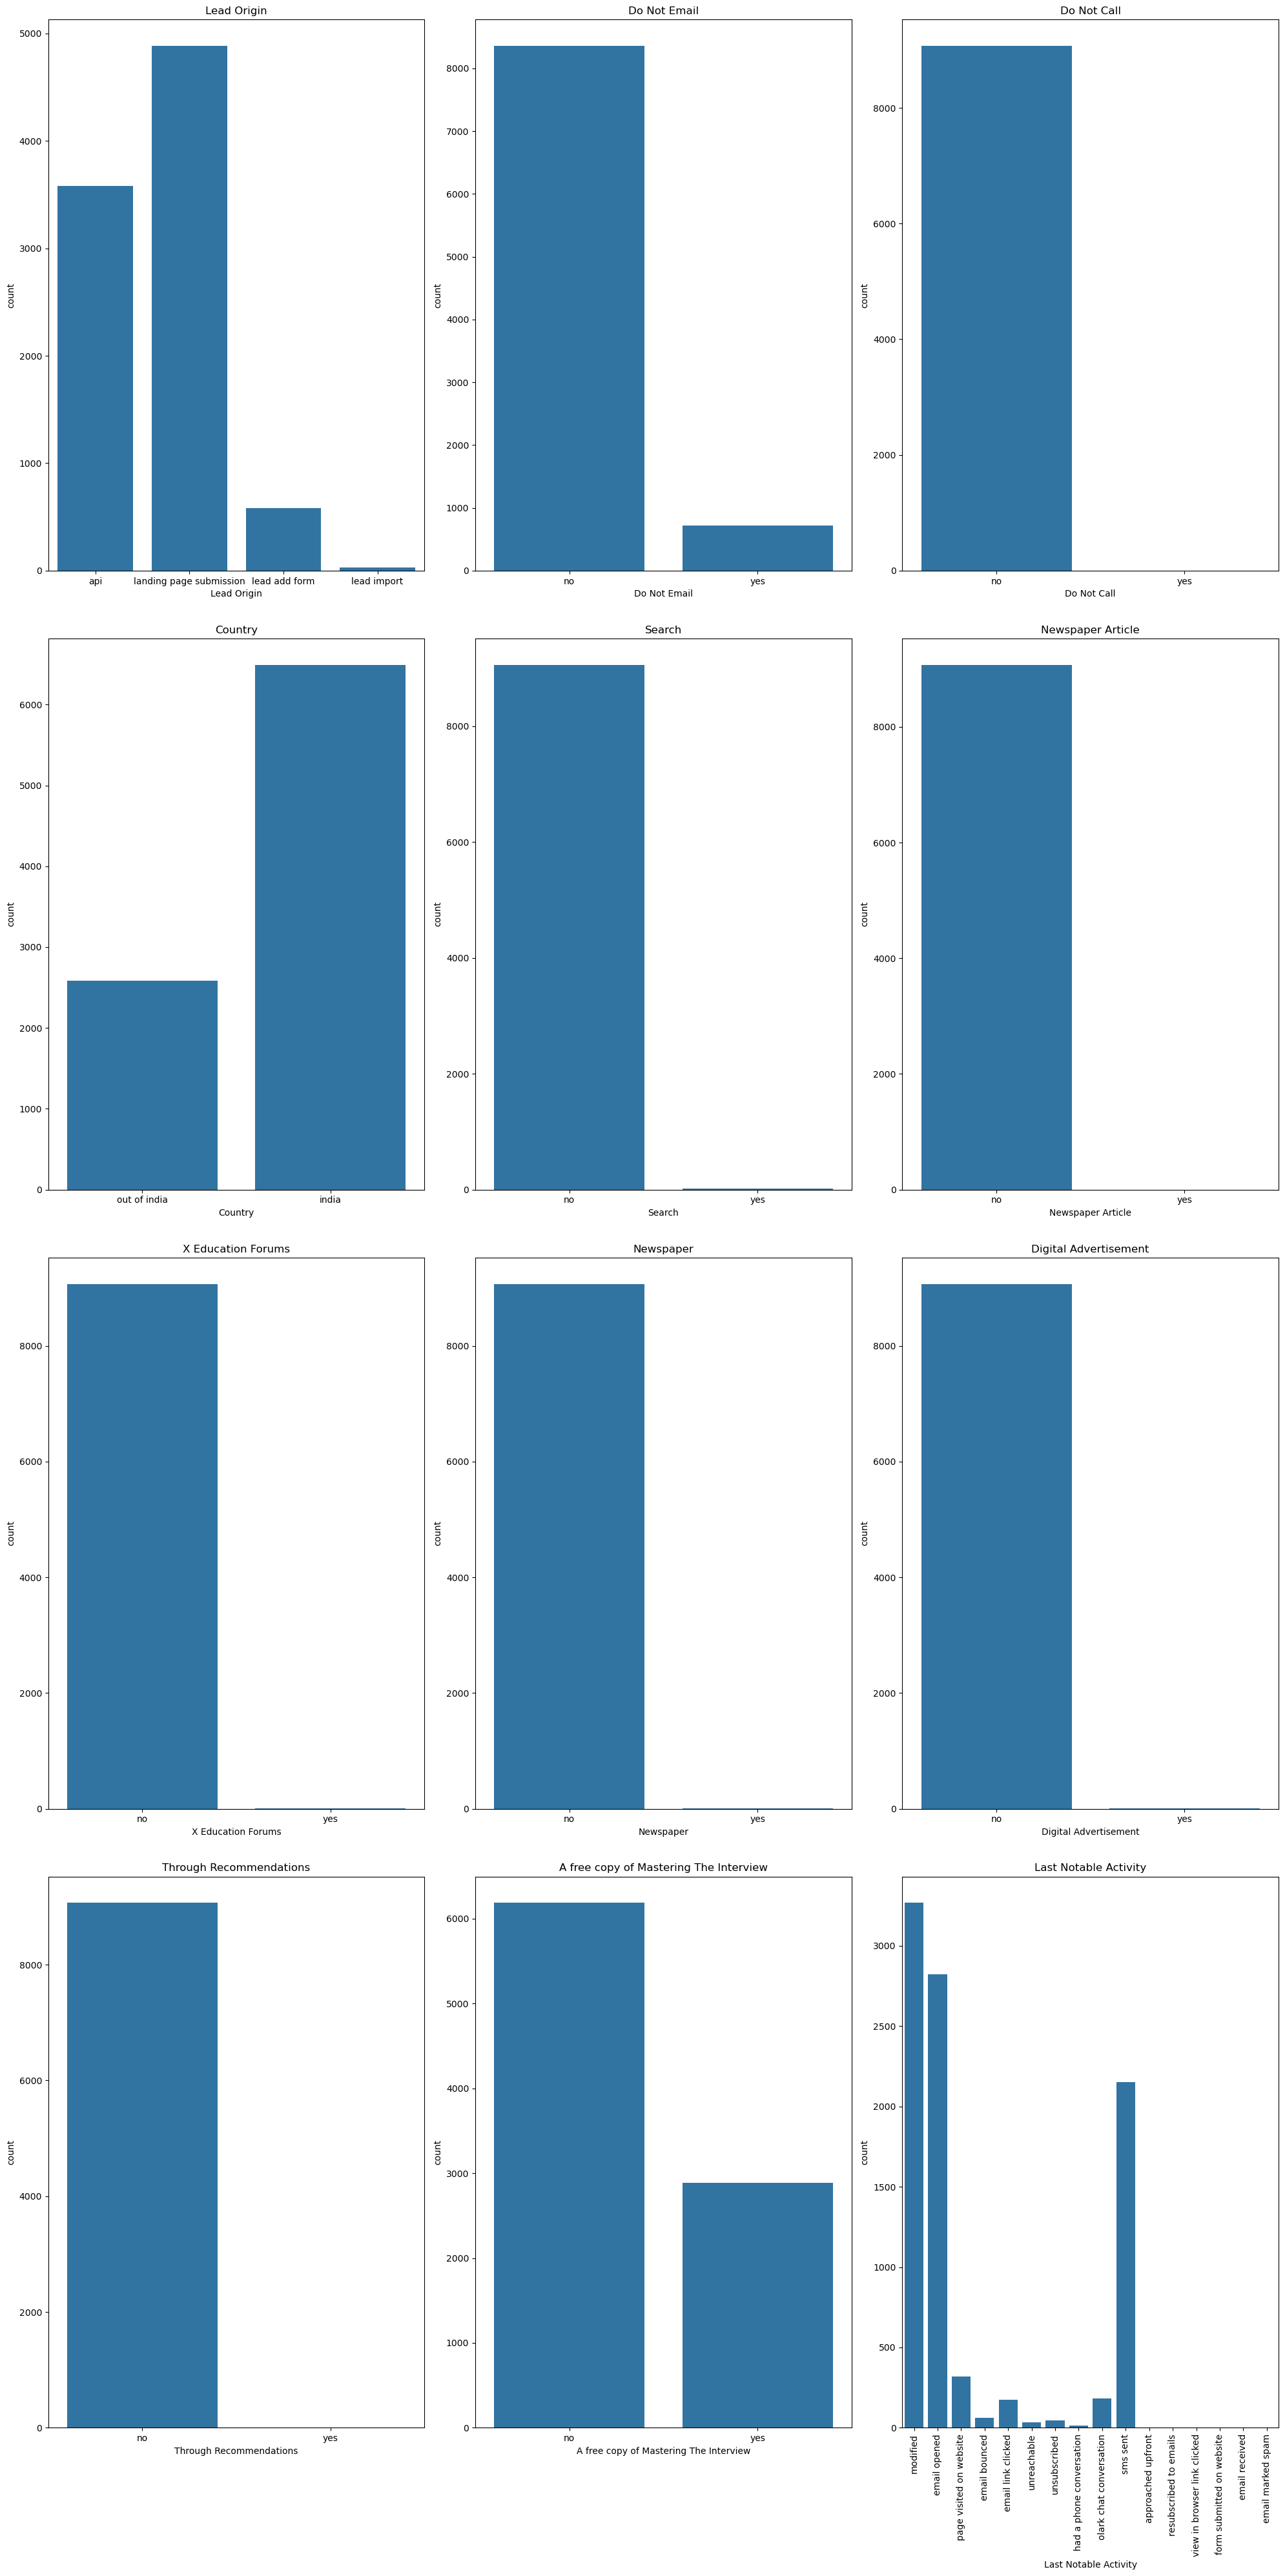

In [58]:
# Set figure size
plt.figure(figsize=(20, 40))

# Define categorical variables to plot
categorical_vars = [
    ('Lead Origin', None),
    ('Do Not Email', None), 
    ('Do Not Call', None),
    ('Country', None),
    ('Search', None),
    ('Newspaper Article', None),
    ('X Education Forums', None),
    ('Newspaper', None), 
    ('Digital Advertisement', None),
    ('Through Recommendations', None),
    ('A free copy of Mastering The Interview', None),
    ('Last Notable Activity', 90)
]

# Create subplots in a 4x3 grid
for idx, (var, rotation) in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, idx)
    sns.countplot(data=lead_data, x=var)
    plt.title(var)
    if rotation:
        plt.xticks(rotation=rotation)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout(h_pad=3, w_pad=1)

plt.show()

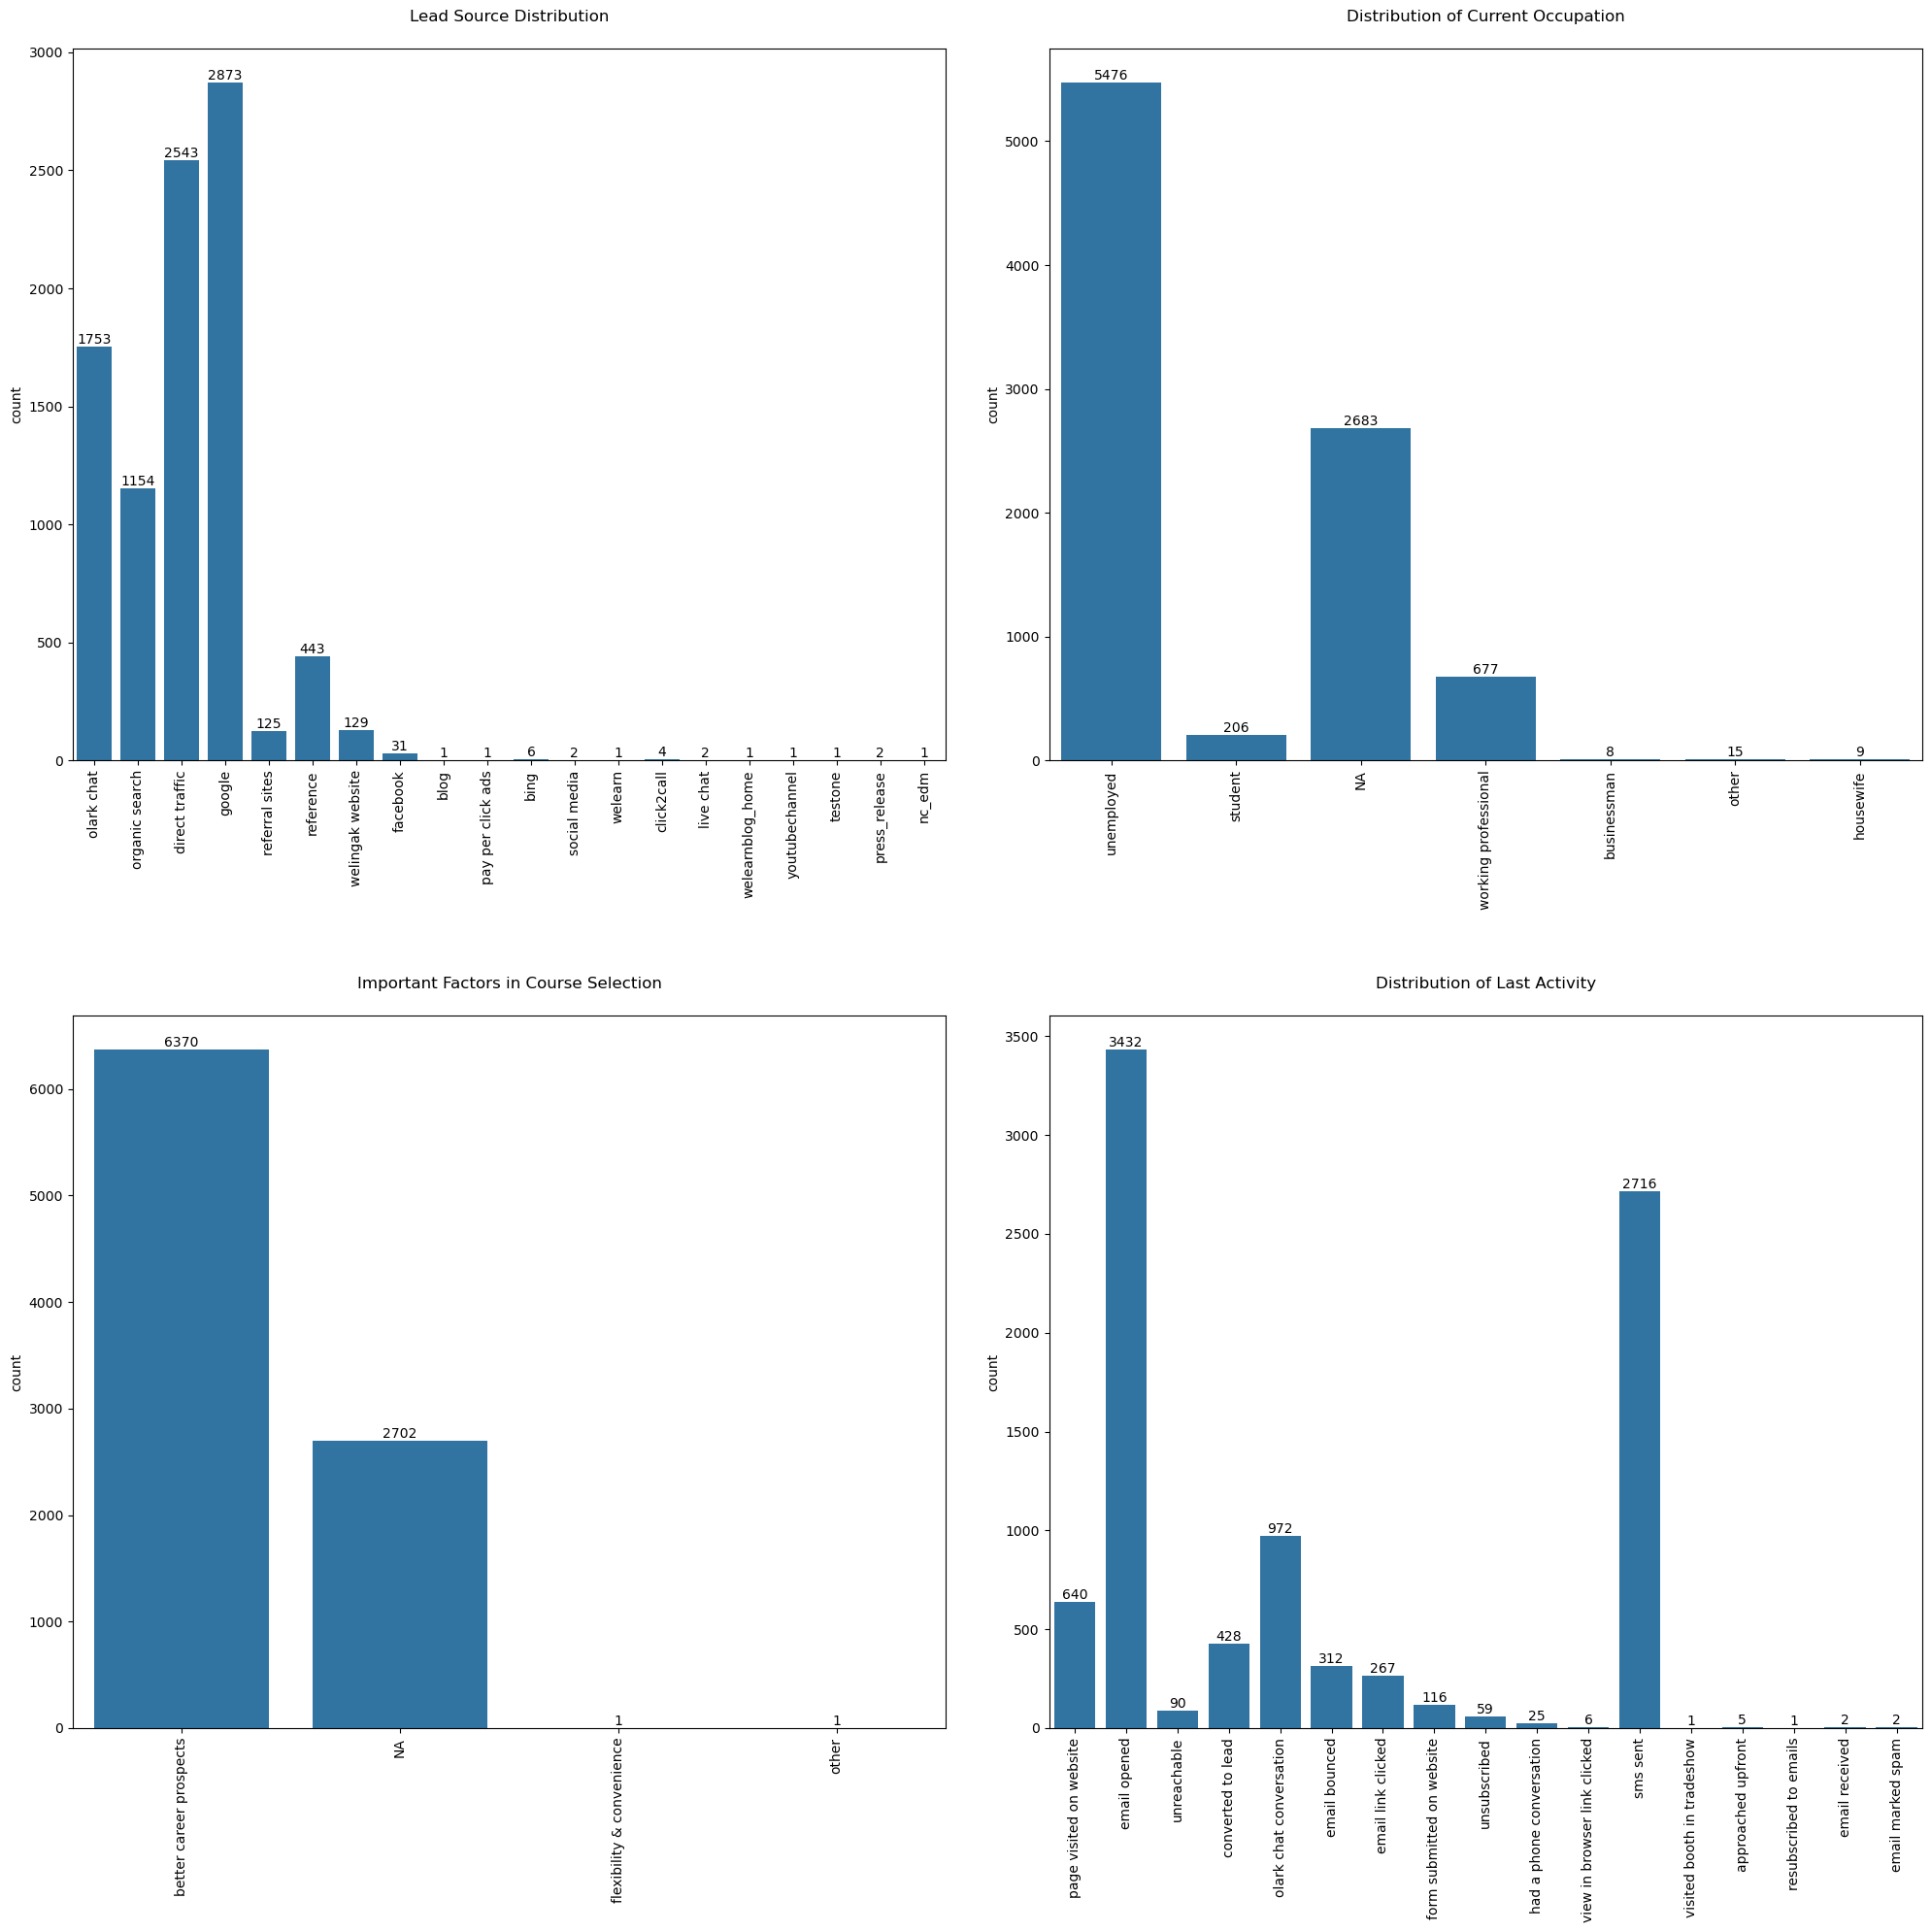

In [59]:
# Create figure with subplots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Define variables to plot
plot_vars = [
    ('Lead Source', 'Lead Source Distribution'),
    ('What is your current occupation', 'Distribution of Current Occupation'), 
    ('What matters most to you in choosing a course', 'Important Factors in Course Selection'),
    ('Last Activity', 'Distribution of Last Activity')
]

# Create subplots
for idx, (var, title) in enumerate(plot_vars):
    row = idx // 2
    col = idx % 2
    
    # Create countplot
    sns.countplot(data=lead_data, x=var, ax=axes[row, col])
    
    # Customize plot
    axes[row, col].set_title(title, pad=20, fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=90)
    axes[row, col].set_xlabel('')
    
    # Add value labels on top of bars
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width()/2., p.get_height()),
                              ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout(h_pad=5, w_pad=3)
plt.show()

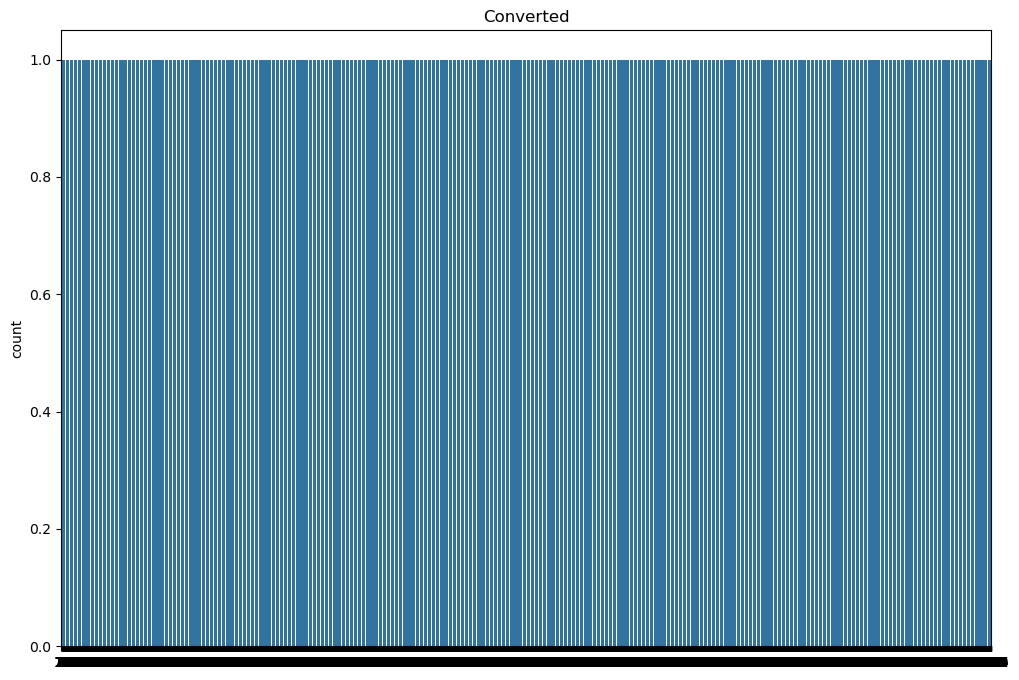

In [60]:
# Plot for target variable "Converted"
plt.figure(figsize = (12,8))  # Setting the figure size for ease of reading the plot
sns.countplot(lead_data['Converted'])  
plt.title('Converted')  # Setting the title for the plot
plt.show()

### 3.1.2 Numerical Variables

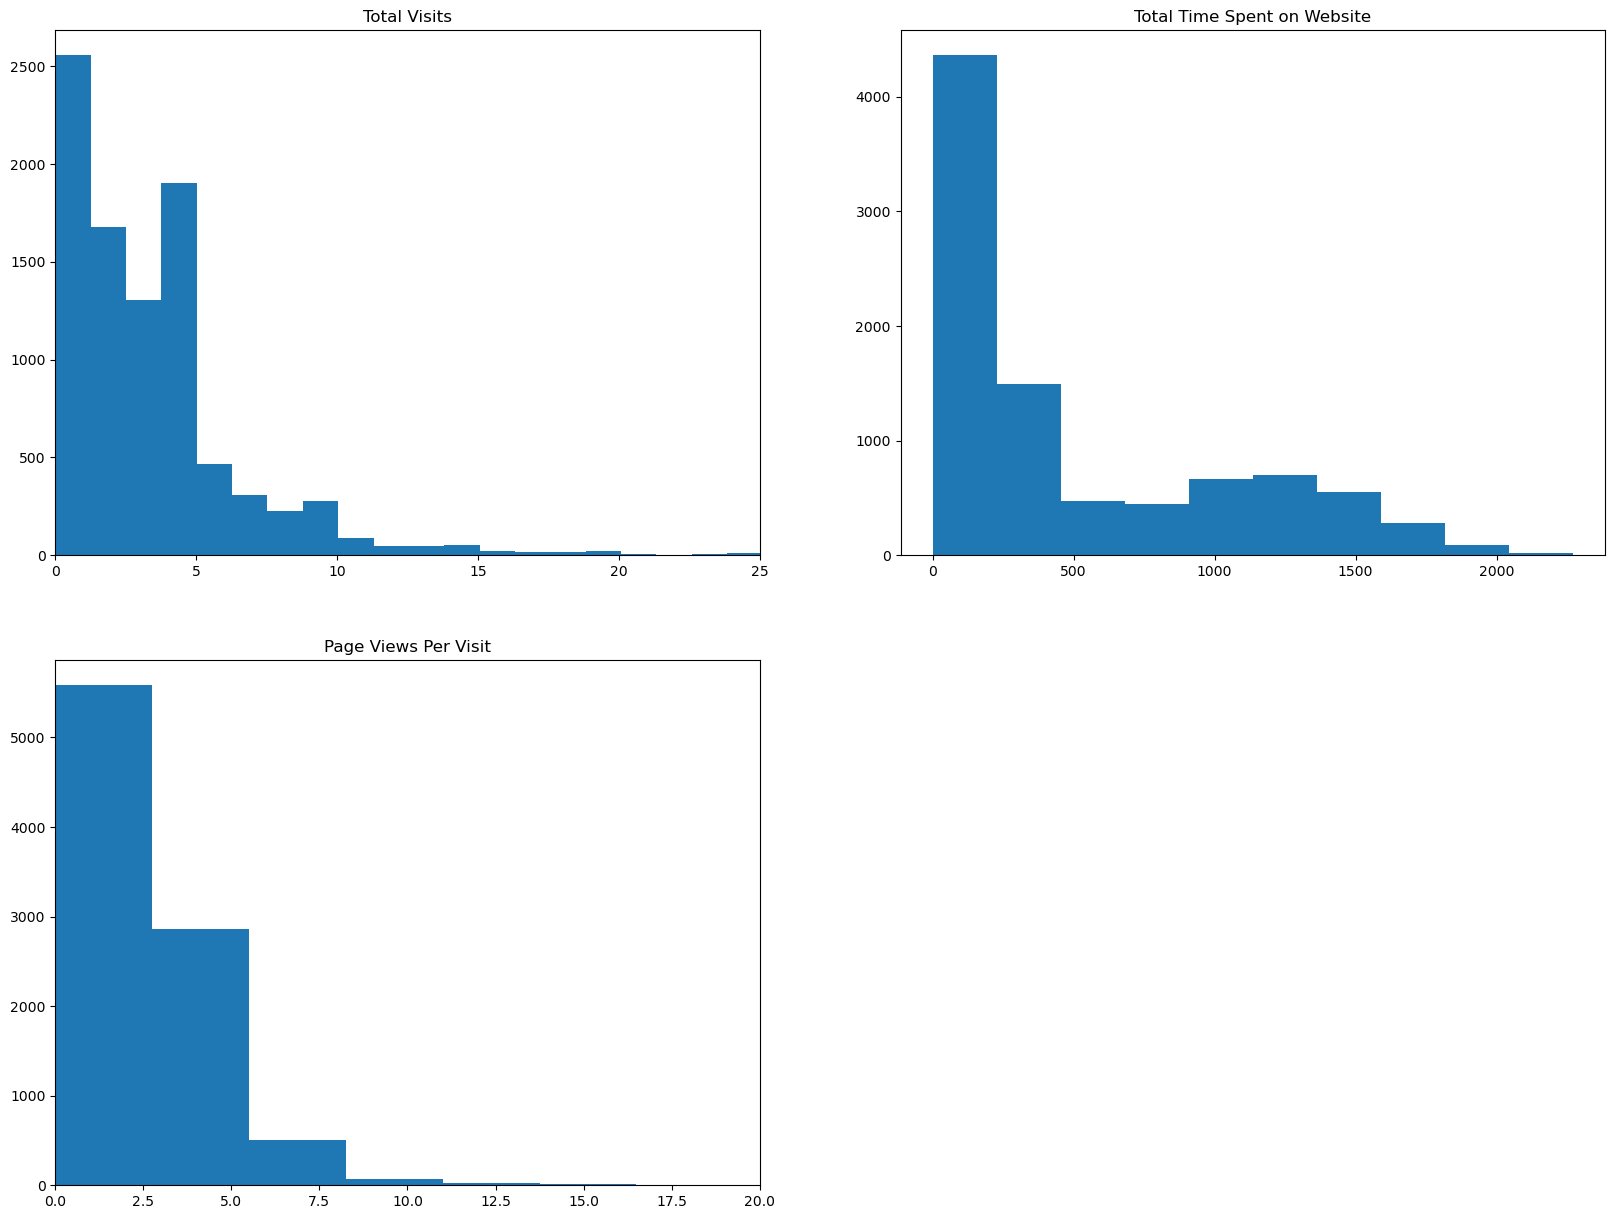

In [ ]:
plt.figure(figsize = (20,15))  # Setting the figure size for ease of reading the plot

plt.subplot(221)  # Subplot for ease of comparing the plots
plt.hist(lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')  # Setting the title for the plot
plt.xlim(0,25)

plt.subplot(222)  # Subplot for ease of comparing the plots
plt.hist(lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')  # Setting the title for the plot

plt.subplot(223)  # Subplot for ease of comparing the plots
plt.hist(lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')  # Setting the title for the plot
plt.xlim(0,20)
plt.show()

## 3.2 Categorical variables based on Target variable

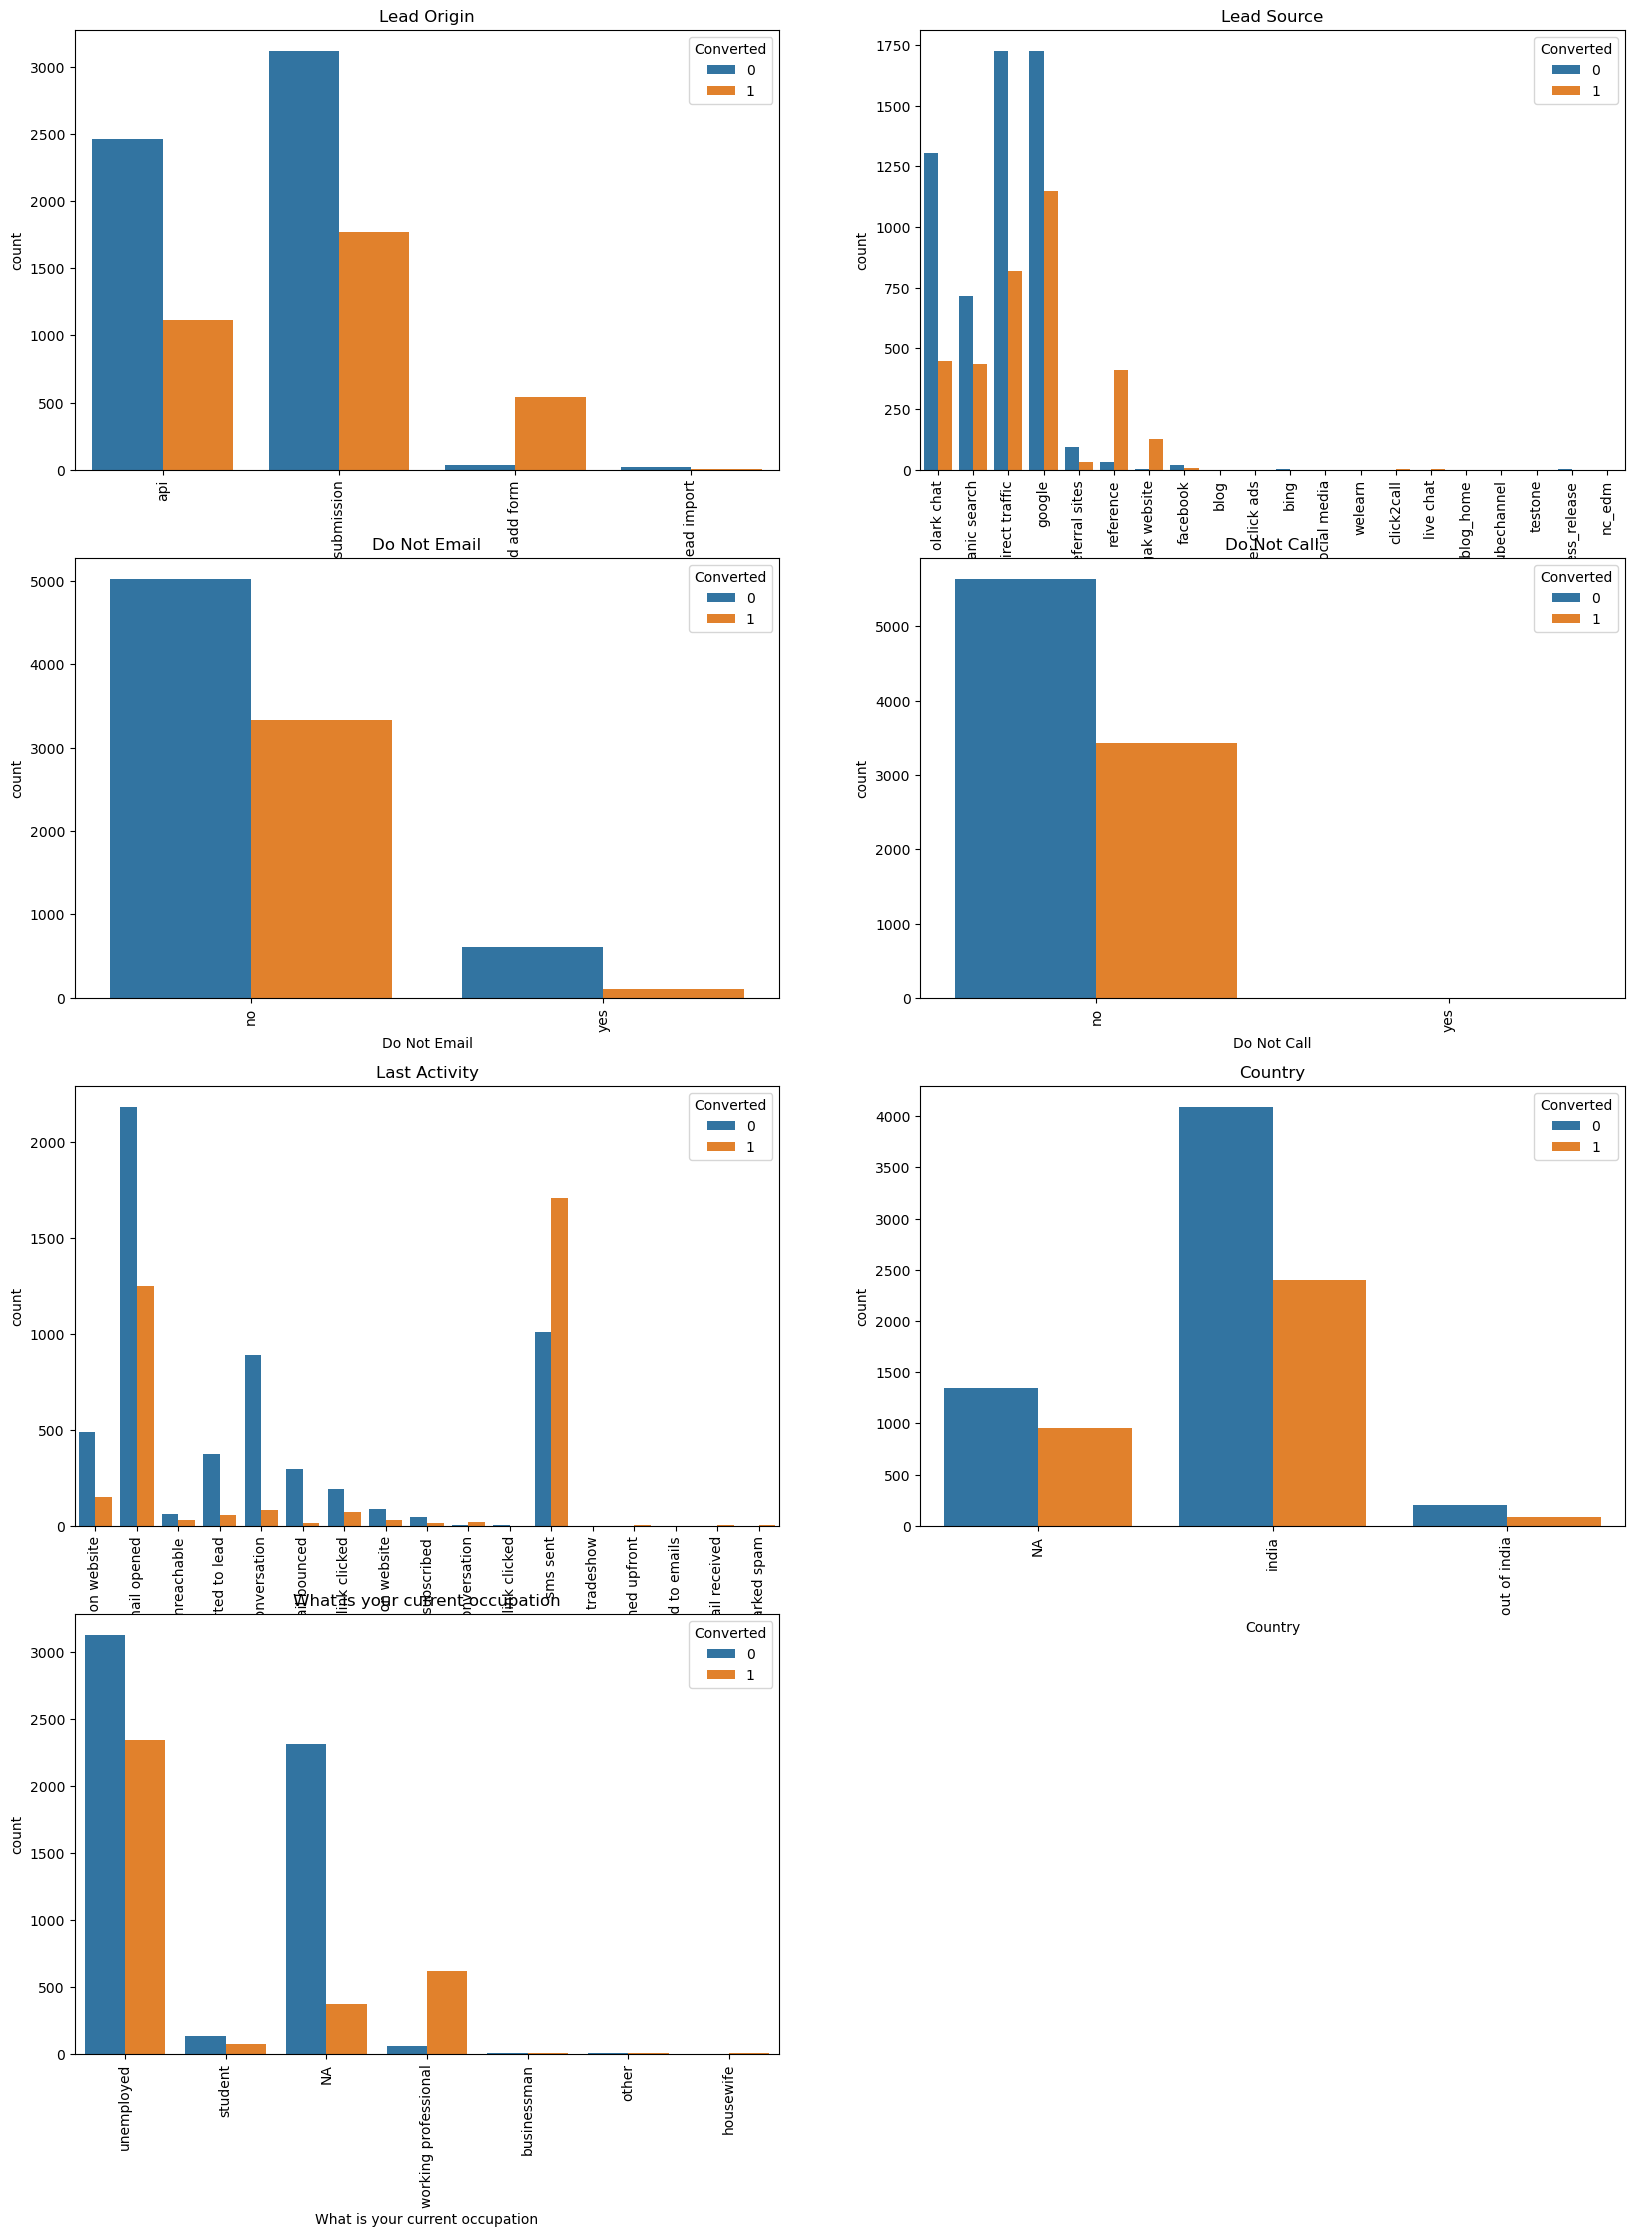

In [ ]:
plt.figure(figsize = (20,40))  # Setting the figure size for ease of reading the plot

plt.subplot(6,2,1)  # Subplot for ease of comparing the plots
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')  # Setting the title for the plot

plt.subplot(6,2,2)  # Subplot for ease of comparing the plots
sns.countplot(x='Lead Source', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')  # Setting the title for the plot

plt.subplot(6,2,3)  # Subplot for ease of comparing the plots
sns.countplot(x='Do Not Email', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')  # Setting the title for the plot

plt.subplot(6,2,4)  # Subplot for ease of comparing the plots
sns.countplot(x='Do Not Call', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')  # Setting the title for the plot

plt.subplot(6,2,5)  # Subplot for ease of comparing the plots
sns.countplot(x='Last Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')  # Setting the title for the plot

plt.subplot(6,2,6)  # Subplot for ease of comparing the plots
sns.countplot(x='Country', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')  # Setting the title for the plot

plt.subplot(6,2,7)  # Subplot for ease of comparing the plots
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')  # Setting the title for the plot

plt.show()

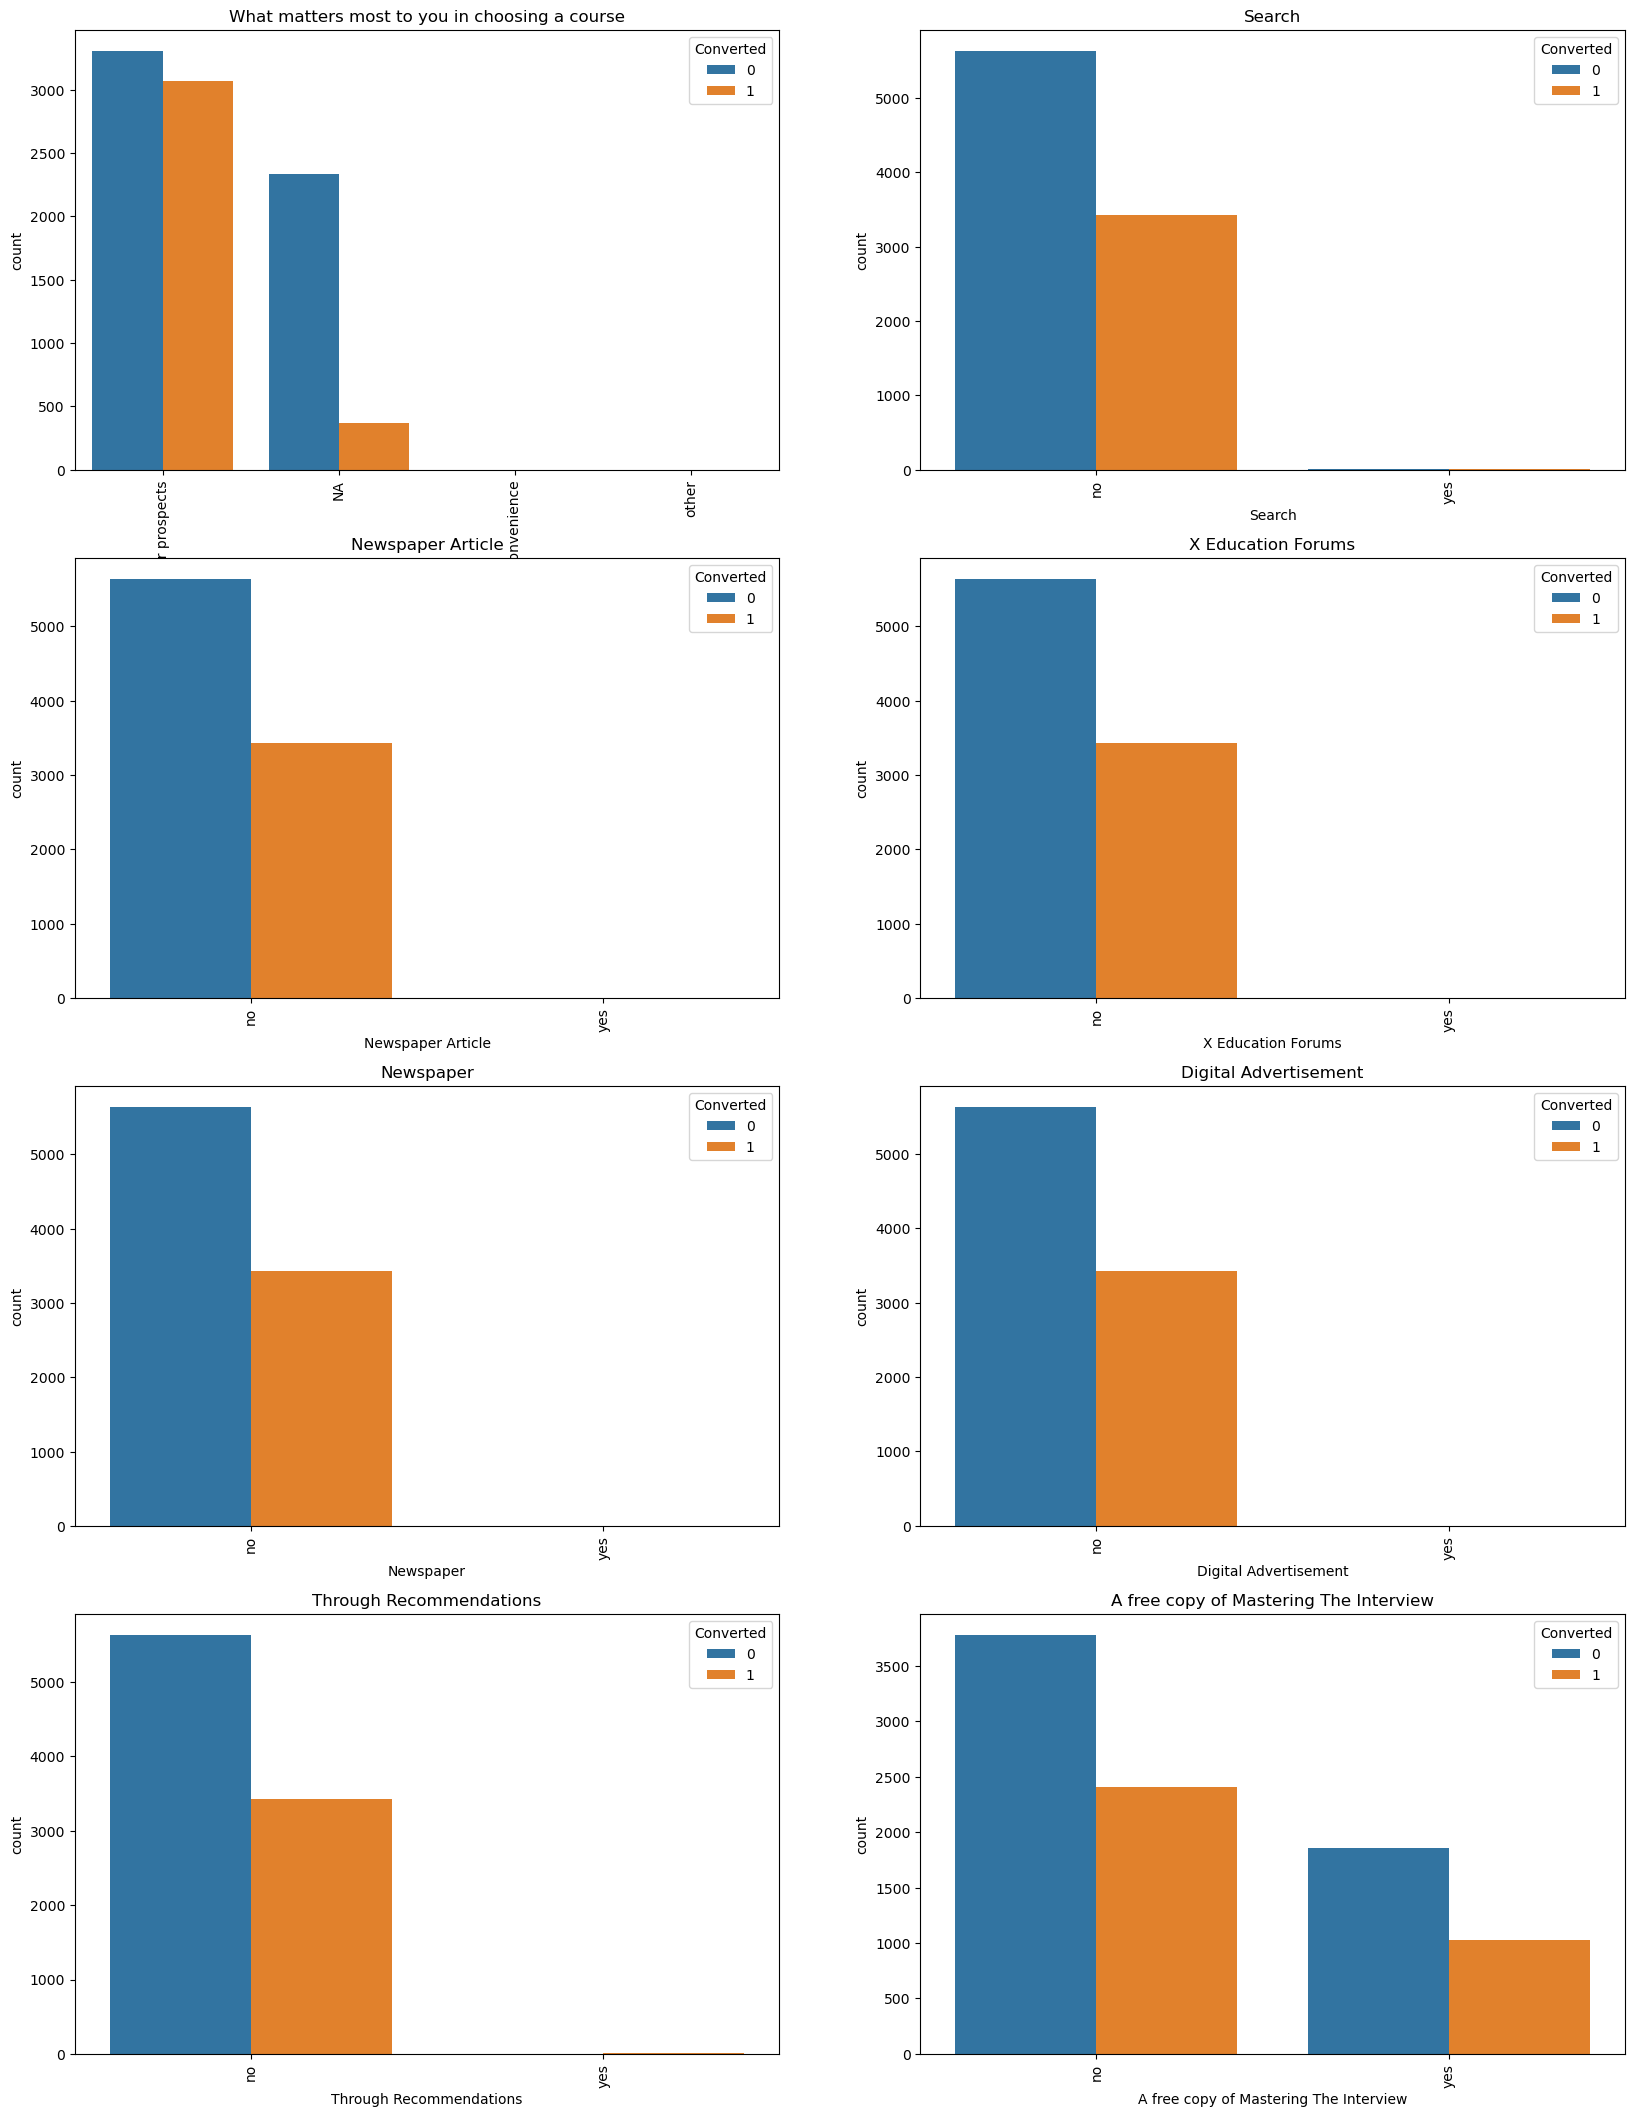

In [ ]:
plt.figure(figsize = (20,40))  # Setting the figure size for ease of reading the plot

plt.subplot(6,2,1)  # Subplot for ease of comparing the plots
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')  # Setting the title for the plot

plt.subplot(6,2,2)  # Subplot for ease of comparing the plots
sns.countplot(x='Search', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')  # Setting the title for the plot

plt.subplot(6,2,3)  # Subplot for ease of comparing the plots
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')  # Setting the title for the plot

plt.subplot(6,2,4)  # Subplot for ease of comparing the plots
sns.countplot(x='X Education Forums', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')  # Setting the title for the plot

plt.subplot(6,2,5)  # Subplot for ease of comparing the plots
sns.countplot(x='Newspaper', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')  # Setting the title for the plot

plt.subplot(6,2,6)  # Subplot for ease of comparing the plots
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')  # Setting the title for the plot

plt.subplot(6,2,7)  # Subplot for ease of comparing the plots
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')  # Setting the title for the plot

plt.subplot(6,2,8)  # Subplot for ease of comparing the plots
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')  # Setting the title for the plot

plt.show()

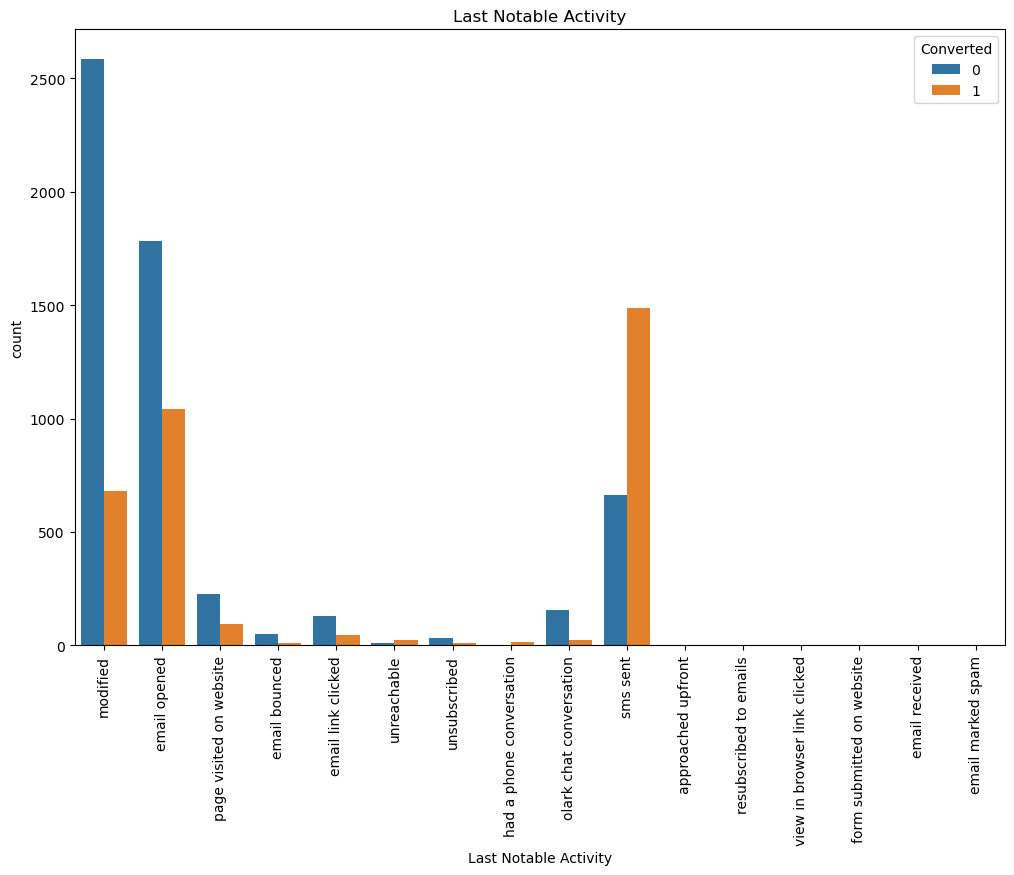

In [ ]:
# Plot for 'Last Notable Activity'.
plt.figure(figsize = (12,8))  # Setting the figure size for ease of reading the plot
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')   # Setting the title for the plot
plt.show()

In [ ]:
# Checking the correlation among the variables
# plt.figure(figsize=(20,15))   # Setting the figure size for ease of reading the plot
# sns.heatmap(lead_data.corr(), cmap='Reds', annot=True, fmt='.2f')
# plt.show()